In [3]:
# importing useful libs on the go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
import math
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import collections
from sklearn.grid_search import GridSearchCV

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

% matplotlib inline

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [199]:
train = pd.read_csv('Training_Dataset.csv')

In [200]:
leader = pd.read_csv('Leaderboard_Dataset.csv')

In [201]:
mkc = leader['cm_key']

In [202]:
def data_clean(leaderboard):
    leaderboard.drop(['mvar1','cm_key'],axis=1,inplace=True)

    leaderboard.loc[ leaderboard['mvar2'] <= 3, 'mvar2']= 0
    leaderboard.loc[ (leaderboard['mvar2'] >= 4) & (leaderboard['mvar2'] <= 7) ,'mvar2']= 1
    leaderboard.loc[ (leaderboard['mvar2'] >= 8) & (leaderboard['mvar2'] <= 11) , 'mvar2']= 2
    leaderboard['mvar2'] = leaderboard['mvar2'].astype(int)

#     mean = leaderboard.loc[leaderboard['mvar3']>0 ,'mvar3'].mean()
#     std = leaderboard.loc[leaderboard['mvar3']>0 ,'mvar3'].std()
#     count = leaderboard.loc[leaderboard['mvar3']==0,'mvar3'].count()
#     money_random_list = np.random.randint(mean - std/3, mean + std/3, size=count)

#     leaderboard.loc[leaderboard['mvar3']==0,'mvar3'] = money_random_list

#     leaderboard['mvar3'] = leaderboard['mvar3'].astype(int)

    leaderboard.rename(columns={'mvar3':'cust_spend'},inplace=True)

    leaderboard.rename(columns={'mvar2':'family_size'},inplace=True)

    leaderboard.rename(columns={'mvar4':'number_cards'},inplace=True)

    leaderboard.rename(columns={'mvar5':'number_months'},inplace=True)
    leaderboard['number_months'] = leaderboard['number_months'].astype(int)
    leaderboard['number_years'] = leaderboard['number_months']//12
    leaderboard.drop(['number_months'],axis=1 , inplace=True )

    leaderboard.rename(columns={'mvar6':'club_fee'},inplace=True)

    leaderboard.rename(columns={'mvar7':'high_spend_affinity'},inplace=True)
    leaderboard.rename(columns={'mvar8':'internal_influencer'},inplace=True)
    leaderboard.rename(columns={'mvar9':'income'},inplace=True)
    mean = leaderboard.loc[leaderboard['income']>0 ,'income'].mean()
    std = leaderboard.loc[leaderboard['income']>0 ,'income'].std()
    count = leaderboard.loc[leaderboard['income']==0,'income'].count()
    money_random_list = np.random.randint(mean - std/3, mean + std/3, size=count)
    leaderboard.loc[leaderboard['income']==0,'income'] = money_random_list

    leaderboard.rename(columns={'mvar10':'platinum'},inplace=True)
    leaderboard.rename(columns={'mvar11':'busniess_expand'},inplace=True)

    rename = {'Office supplies    ':0 ,'Unknown            ':1 , 'Misc services      ':2 , 'Social services    ':3 , 'Manufacturing      ':4 , 'Entertainment      ':5 , 'Construction       ' :6 , 'Apparel': 7 , 'Finance            ':8 ,  'Automotive         ':9 , 'Personal services  ':10 , 'Consumables        ':11,'Household          ':12 , 'Transport          ' :13 , 'Non durable goods  ':14,'Durable goods      ':15 , 'Produce            ':16 ,  'Mining             ':17 }     
    leaderboard['mvar12'] = leaderboard['mvar12'].map(rename).astype(int)
    leaderboard.rename(columns={'mvar12':'industry_code'},inplace=True)
    leaderboard.rename(columns={'mvar13':'number_payments'},inplace=True)

    leaderboard.rename(columns={'mvar14':'club_membership'},inplace=True)
    leaderboard.rename(columns={'mvar15':'air_miles_membership'},inplace=True)

    leaderboard['electric_spend'] = leaderboard['mvar16']+leaderboard['mvar17']+leaderboard['mvar18']+leaderboard['mvar19']
    leaderboard['travel_spend'] = leaderboard['mvar23']+leaderboard['mvar22']+leaderboard['mvar21']+leaderboard['mvar20']
    leaderboard['household_spend'] = leaderboard['mvar24']+leaderboard['mvar25']+leaderboard['mvar26']+leaderboard['mvar27']
    leaderboard['car_spend'] = leaderboard['mvar28']+leaderboard['mvar29']+leaderboard['mvar30']+leaderboard['mvar31']
    leaderboard['retail_spend'] = leaderboard['mvar32']+leaderboard['mvar33']+leaderboard['mvar34']+leaderboard['mvar35']
    leaderboard['total_spend'] = leaderboard['mvar36']+leaderboard['mvar37']+leaderboard['mvar38']+leaderboard['mvar39']

    drop_columns = ['mvar16','mvar17','mvar18','mvar19','mvar20','mvar21','mvar22','mvar23','mvar24','mvar25','mvar26','mvar27','mvar28','mvar29','mvar30','mvar31','mvar32','mvar33','mvar34','mvar35','mvar36','mvar37','mvar38','mvar39']
    leaderboard.drop(drop_columns,axis=1,inplace=True)
    leaderboard.rename(columns = {'mvar1':'card_product_type','mvar2':'family_size','mvar3':'spending_cap','mvar4':'total_cards','mvar5':'months_open','mvar6':'membership_fees','mvar7':'internal_score','mvar8':'influencer_score','mvar9':'income','mvar10':'platinum_card','mvar11':'business_exp_score','mvar12':'industry_code','mvar13':'made_payments','mvar14':'membership_number','mvar15':'air_miles','mvar16':'electronics_1','mvar17':'electronics_2','mvar18':'electronics_3','mvar19':'electronics_4','mvar20':'travel_1','mvar21':'travel_2','mvar22':'travel_3','mvar23':'travel_4','mvar24':'household_1','mvar25':'household_2','mvar26':'household_3','mvar27':'household_4','mvar28':'car_1','mvar29':'car_2','mvar30':'car_3','mvar31':'car_4','mvar32':'retail_1','mvar33':'retail_2','mvar34':'retail_3','mvar35':'retail_4','mvar36':'total_spend','mvar40':'extended_supp','mvar41':'extended_elite','mvar42':'extended_credit','mvar43':'accepted_supp','mvar44':'accepted_elite','mvar45':'accepted_credit','mvar46':'indicator_supp','mvar47':'indicator_elite','mvar48':'indicator_credit','mvar49':'acceptance_supp','mvar50':'acceptance_elite','mvar51':'acceptance_credit'}, inplace = True)
    
    lis = []
    for index,row in leaderboard.iterrows():
        if row['extended_supp']>0:
            lis.append( row['accepted_supp']/ row['extended_supp'])
        else:
            lis.append(0)
    leaderboard['Supp'] = lis
    
    lis = []
    for index,row in leaderboard.iterrows():
        if row['extended_credit']>0:
            lis.append( row['accepted_credit']/ row['extended_credit'])
        else:
            lis.append(0)
    leaderboard['Credit'] = lis
    
    lis = []
    for index,row in leaderboard.iterrows():
        if row['extended_elite']>0:
            lis.append( row['accepted_elite']/ row['extended_elite'])
        else:
            lis.append(0)
    leaderboard['Elite'] = lis
    leaderboard.drop(['extended_supp','accepted_supp','extended_credit','accepted_elite','accepted_credit','extended_elite','retail_spend'],axis=1,inplace=True)
    leaderboard['income']= pd.qcut(leaderboard['income'],10,duplicates='drop',labels=False)
    leaderboard['cust_spend']= pd.qcut(leaderboard['cust_spend'],10,duplicates='drop',labels=False)
    leaderboard['travel_spend']= pd.qcut(leaderboard['travel_spend'],10,duplicates='drop',labels=False)
    leaderboard['total_spend']= pd.qcut(leaderboard['total_spend'],10,duplicates='drop',labels=False)
    leaderboard['car_spend']= pd.qcut(leaderboard['car_spend'],10,duplicates='drop',labels=False)
    leaderboard['household_spend']= pd.qcut(leaderboard['household_spend'],10,duplicates='drop',labels=False)
    leaderboard['electric_spend']= pd.qcut(leaderboard['electric_spend'],10,duplicates='drop',labels=False)
    
    return leaderboard

In [203]:
train = data_clean(train)

In [204]:
leader = data_clean(leader)

In [205]:
lis = []

for index ,row in train.iterrows():
    if (row['indicator_credit'] == 1) :
        lis.append(3)
    elif (row['indicator_supp'] == 1):
        lis.append(1)
    elif (row['indicator_elite'] == 1):
        lis.append(2)
    else:
        lis.append(0)
        
train['label1']= lis

In [206]:
train['label1'].value_counts()

1    17033
2    11656
3    11311
Name: label1, dtype: int64

In [207]:
lis = []

for index ,row in train.iterrows():
    if (row['acceptance_credit'] == 1) :
        lis.append(3)
    elif (row['acceptance_supp'] == 1):
        lis.append(1)
    elif (row['acceptance_elite'] == 1):
        lis.append(2)
    else:
        lis.append(0)
        
train['label2']= lis

In [208]:
train.drop(['indicator_elite','indicator_supp','indicator_credit','acceptance_supp','acceptance_credit','acceptance_elite'],axis=1,inplace=True)

In [209]:
lis = []

for index ,row in train.iterrows():
    if (row['label1'] == row['label2']) :
        lis.append(1)
    elif (row['label2'] > 0):
        lis.append(2)
    else:
        lis.append(0)
        
train['label3']= lis

In [210]:
train.drop(['label1'],axis=1, inplace=True)


In [4]:
train = pd.read_csv('train_modified_new.csv')
leader = pd.read_csv('test_modified_new.csv')

In [5]:
leader.head(), train.head()

(   cm_key  platinum  busniess_expand  industry_code  number_payments  \
 0   50004         0           1.5442             11               11   
 1   50005         0           2.6261             14               14   
 2   50006         0           4.8671              8               12   
 3   50008         0           1.1001              1               10   
 4   50010         0           2.8097              1               12   
 
    club_membership  air_miles_membership  family_size  cust_spend  \
 0                1                     1            0           1   
 1                6                     0            0           1   
 2                1                     0            0           1   
 3                3                     1            0           7   
 4                1                     0            0           6   
 
    number_cards  club_fee  high_spend_affinity  internal_influencer  income  \
 0             9       432               0.1016           

In [6]:
leader.head()

,cm_key,platinum,busniess_expand,industry_code,number_payments,club_membership,air_miles_membership,family_size,cust_spend,number_cards,club_fee,high_spend_affinity,internal_influencer,income,number_years,electric_spend,travel_spend,household_spend,car_spend,total_spend,Supp,Credit,Elite
0,50004,0,1.5442,11,11,1,1,0,1,9,432,0.1016,0.5074,4,7,0,0,2,1,2,0,0,0
1,50005,0,2.6261,14,14,6,0,0,1,4,0,0.7969,0.2310,5,0,6,2,6,0,4,0,0,0
2,50006,0,4.8671,8,12,1,0,0,1,4,533,0.3863,0.1155,2,2,3,4,4,3,6,0,0,0
3,50008,0,1.1001,1,10,3,1,0,7,4,0,0.0398,0.0000,5,0,0,0,4,1,0,0,0,0
4,50010,0,2.8097,1,12,1,0,0,6,1,327,0.2967,0.0000,5,0,2,5,2,0,4,0,0,0


In [7]:
mkc = leader['cm_key']

In [8]:
train.drop(['cm_key'],axis=1,inplace=True)

In [9]:
leader.drop(['cm_key'],axis=1,inplace=True)

In [10]:
y = train['label3']
X = train[[col for col in train.columns if( col!="label3" and col !='label2') ]]

In [11]:
scale= StandardScaler()
X = scale.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(scale.fit_transform(leader))

In [12]:
X.shape,leader.shape

((40000L, 22L), (10000, 22))

In [13]:
# clf = xgb.XGBClassifier(
#     eval_metric = 'auc',
#     num_class = 2,
#     n_jobs = -1,
#     eta = 0.1,
#     num_boost_round = 50,
#     max_depth = 12,
#     subsample = 0.5,
#     colsample_bytree = 1.0,
#     silent = 1,
#     objective = 'binary:logistic'

#     )

In [14]:
parameters = {'n_jobs':[-1], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05,.1,.3], #so called `eta` value
              'max_depth': [3,4,5,6],
              'min_child_weight': [1,2,3,4],
              'silent': [0],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5,20,50], #number of trees, change it to 1000 for better results
              'seed': [1337]}

In [89]:
# params = {
#     # Parameters that we are going to tune.
#     'max_depth':[3,5,7,9],
#     'min_child_weight': [1,2,3,4],
#     'num_boost_round' : [100,250,500],
#     'eta':[.05,.1,.3],
#     'subsample': [.8,.9,1],
#     'colsample_bytree': [.9,.1],
#     # Other parameters
    
# }

In [90]:
xgb_model = xgb.XGBClassifier()

In [91]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(y, n_folds=5, shuffle=True), 
                   scoring='accuracy',
                   verbose=2, refit=True)


In [92]:
clf.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\externals\joblib\pool.py:438: UserWarning: Failed to clean temporary folder: c:\users\welcome\appdata\local\temp\joblib_memmaping_pool_4580_370463016
  warnings.warn("Failed to clean temporary folder: %s" % folder_path)


KeyboardInterrupt: 

In [219]:
#trust your CV!
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

('Raw AUC score:', 0.779725)
colsample_bytree: 0.7
learning_rate: 0.3
max_depth: 3
min_child_weight: 4
n_estimators: 50
n_jobs: -1
objective: 'binary:logistic'
seed: 1337
silent: 0
subsample: 0.8


In [15]:
para ={
    'colsample_bytree': 0.7,
    'learning_rate': 0.3,
    'max_depth': 3,
    'min_child_weight': 4,
    'n_estimators': 50,
    'n_jobs': -1,
    'objective': 'binary:logistic',
    'seed': 1337,
    'silent': 0,
    'subsample': 0.8
    }

In [96]:
# xg_class = xgb.XGBClassifier(max_depth=5,min_child_weight=1,n_estimators=50,n_jobs=-1,objective='binary:logistic',seed=1337,subsample=.8,colsample_bytree=.7,learning_rate=.1,silent=0)

In [17]:
# early_stopping_rounds = 50
# cv_folds = 5
# import random
# SEED = 3
# random.seed(SEED)
# np.random.seed(SEED)

# model = xgb.XGBClassifier(seed=SEED)

# cvresult = xgb.cv(params, dtrain, num_boost_round = 500,
#                       nfold = cv_folds, metrics = 'auc',
#                       early_stopping_rounds = early_stopping_rounds,
#                       seed = SEED)

# cvresult

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.628466,0.010971,0.655015,0.002880
1,0.634486,0.011587,0.669372,0.003484
2,0.639349,0.010101,0.680519,0.004668
3,0.643221,0.010379,0.688721,0.003727
4,0.643941,0.009672,0.696935,0.004491
5,0.644888,0.009567,0.703753,0.004304
6,0.644934,0.009627,0.710245,0.004145
7,0.645646,0.009868,0.716511,0.003746
8,0.645790,0.009213,0.721748,0.003256


In [18]:
# cvresult.shape

(9, 4)

In [19]:
# print ("Optimal number of trees (estimators) is %i" % cvresult.shape[0])

Optimal number of trees (estimators) is 9


In [82]:
# model.set_params(n_estimators = 9)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=9,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=3, silent=True,
       subsample=1)

In [25]:
# # gridsearch_params = [
# #     (max_depth, min_child_weight)
# #     for max_depth in range(3,10)
# #     for min_child_weight in range(1,6)
# # ]

# param_test1 = {
#     'max_depth' : range(1,8),
#     'min_child_weight': range(1,10)
# }

# gsearch1 = GridSearchCV(estimator = model, param_grid = param_test1,
#                         scoring = 'roc_auc', n_jobs = -1, iid = False,
#                         cv = cv_folds, verbose = 2)

In [26]:
# gsearch1.fit(X,y)
# gsearch1.best_params_

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:  1.2min finished
C:\ProgramData\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


{'max_depth': 6, 'min_child_weight': 5}

,family_size,cust_spend,number_cards,club_fee,high_spend_affinity,internal_influencer,income,platinum,busniess_expand,industry_code,number_payments,club_membership,air_miles_membership,number_years,electric_spend,travel_spend,household_spend,car_spend,total_spend,Supp,Credit,Elite,label2,label3
0,0,2,4,970,0.7969,0.1831,3,1,6.0899,0,12,1,0,1,0,4,4,0,9,0.0,0.0,0.0,0,0
1,0,0,4,1030,0.0678,0.0000,5,1,4.2016,1,11,1,0,1,1,0,0,0,3,0.0,0.0,0.0,0,0
2,0,3,4,327,0.7551,0.2986,4,0,3.3760,2,12,1,1,2,5,2,4,0,7,0.0,0.0,0.0,0,0
3,0,3,4,1258,0.7969,0.5297,5,1,4.1082,3,12,1,0,22,6,7,3,2,6,1.0,0.0,0.0,3,1
4,0,3,6,0,2.3238,0.0000,5,0,0.0000,1,6,2,0,0,0,7,4,0,8,0.0,0.0,0.0,1,1


In [10]:
# # Update our parameters
# params['max_depth'] = 6
# params['min_child_weight'] = 5
Xl =scale.fit_transform(leader)
Xld = xgb.DMatrix(Xl)

In [11]:
clf.predict(Xl).sum()

NameError: name 'clf' is not defined

In [16]:
n_rounds=15

In [17]:
bst = xgb.train(para, dtrain,n_rounds)

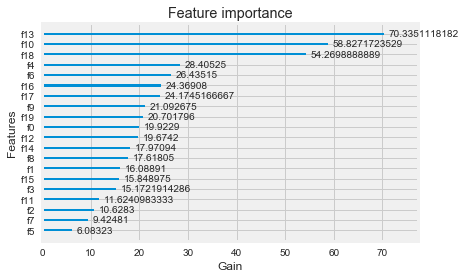

In [18]:
xgb.plot_importance(bst, importance_type='gain', xlabel='Gain')

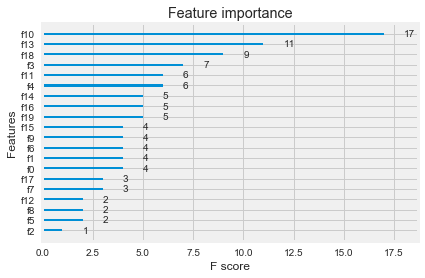

In [19]:
xgb.plot_importance(bst)

In [20]:
pred = (bst.predict(dtest) > .31).astype('int')

In [21]:
collections.Counter(pred)

Counter({0: 9062, 1: 938})

In [22]:
y = train['label2']
X = train[[col for col in train.columns if col !='label2' ]]

In [23]:
lead = leader.copy()
lead['label3'] = pred.tolist() 

In [24]:
lead['cm_key']= mkc

In [25]:
lead.sort_values(['label3'],ascending=False,inplace=True)
lead

,platinum,busniess_expand,industry_code,number_payments,club_membership,air_miles_membership,family_size,cust_spend,number_cards,club_fee,high_spend_affinity,internal_influencer,income,number_years,electric_spend,travel_spend,household_spend,car_spend,total_spend,Supp,Credit,Elite,label3,cm_key
2904,1,5.4417,1,4,1,1,1,9,4,1527,1.1759,0.3243,2,0,7,6,7,0,8,0,0,0,1,57673
3469,0,4.7591,11,13,2,0,0,7,5,0,0.6564,0.3662,4,0,0,1,3,0,7,0,0,0,1,59130
9111,0,5.5457,13,14,1,0,0,9,4,1607,1.4627,0.5612,6,1,7,7,6,0,8,0,0,0,1,58957
6010,0,5.5250,2,12,1,0,0,2,2,245,0.7969,0.1155,2,0,7,2,6,0,6,0,1,0,1,53608
6009,0,6.3851,10,15,1,0,1,6,3,703,3.2362,0.0000,5,2,6,5,5,0,9,1,0,0,1,53607
8022,0,5.6147,2,8,1,0,0,7,2,327,0.7969,0.1155,2,4,5,4,7,2,8,0,0,0,1,57094
3472,0,3.3777,2,6,1,0,0,7,0,0,0.7969,0.1155,0,0,7,4,6,0,7,0,0,0,1,59141
4466,0,3.6246,0,14,1,0,0,6,3,0,0.1226,0.2310,3,0,0,4,7,0,3,0,0,0,1,50975
989,1,6.0113,5,18,1,0,1,9,3,1937,2.2390,0.4398,5,19,6,7,6,3,9,1,0,0,1,52653
4470,0,3.5858,2,6,1,0,0,0,1,917,0.7969,0.4398,4,2,6,7,5,0,8,0,0,0,1,50980


In [26]:
mck_sorted =lead['cm_key']

In [27]:
lead.drop(['cm_key'],axis=1,inplace=True)

In [28]:
scale= StandardScaler()
X = scale.fit_transform(X)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(scale.fit_transform(lead))

In [30]:
X.shape,lead.shape

((40000L, 23L), (10000, 23))

In [31]:
# params2 = {
#     # Parameters that we are going to tune.
#     'max_depth':6,
#     'min_child_weight': 1,
#     'eta':.3,
#     'subsample': 1,
#     'colsample_bytree': 1,
#     # Other parameters
#     'objective':'multi:softprob',
#     'num_class':4
# }

# n_rounds = 15

In [32]:
parameters = {'n_jobs':[-1], #when use hyperthread, xgboost may become slower
              'objective':['multi:softprob'],
              'learning_rate': [0.05,.1,.3], #so called `eta` value
              'max_depth': [3,4,5,6],
              'min_child_weight': [1,2,3,4],
              'silent': [0],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5,20,50], #number of trees, change it to 1000 for better results
              'seed': [1337] }

In [109]:
xgb_model = xgb.XGBClassifier()

In [110]:
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(y, n_folds=5, shuffle=True), 
                   scoring='accuracy',
                   verbose=2, refit=True)

In [51]:
clf.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\externals\joblib\pool.py:438: UserWarning: Failed to clean temporary folder: c:\users\welcome\appdata\local\temp\joblib_memmaping_pool_4580_323721872
  warnings.warn("Failed to clean temporary folder: %s" % folder_path)


KeyboardInterrupt: 

In [148]:
#trust your CV!
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

('Raw AUC score:', 0.92235)
colsample_bytree: 0.7
learning_rate: 0.3
max_depth: 4
min_child_weight: 3
n_estimators: 50
n_jobs: -1
objective: 'multi:softprob'
seed: 1337
silent: 0
subsample: 0.8


In [98]:
# early_stopping_rounds = 50
# cv_folds = 5
# import random
# SEED = 3
# random.seed(SEED)
# np.random.seed(SEED)

# model = xgb.XGBClassifier(seed=SEED)

# cvresult = xgb.cv(params2, dtrain, num_boost_round = 500,
#                       nfold = cv_folds,
#                       early_stopping_rounds = early_stopping_rounds,
#                       seed = SEED)

# cvresult

,test-merror-mean,test-merror-std,train-merror-mean,train-merror-std
0,0.086950,0.003363,0.081594,0.001026
1,0.085000,0.002997,0.079238,0.000752
2,0.083975,0.002772,0.077300,0.000619
3,0.083725,0.002180,0.075638,0.000816
4,0.082750,0.002475,0.074625,0.001011
5,0.082425,0.002843,0.073137,0.000945
6,0.082100,0.002652,0.071825,0.000798
7,0.081275,0.003169,0.071194,0.000827
8,0.080900,0.002729,0.070119,0.000521
9,0.080375,0.003137,0.069325,0.000563


In [99]:
# print ("Optimal number of trees (estimators) is %i" % cvresult.shape[0])

Optimal number of trees (estimators) is 23


In [100]:
# model.set_params(n_estimators = 23)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=23,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=3, silent=True,
       subsample=1)

In [106]:
# # gridsearch_params = [
# #     (max_depth, min_child_weight)
# #     for max_depth in range(3,10)
# #     for min_child_weight in range(1,6)
# # ]

# param_test2 = {
#     'max_depth' : range(1,8),
#     'min_child_weight': range(1,10)
# }

# gsearch1 = GridSearchCV(estimator = model, param_grid = param_test2,
#                         scoring = 'accuracy', n_jobs = -1, iid = False,
#                         cv = cv_folds, verbose = 2)

In [107]:
# gsearch1.fit(X,y)
# gsearch1.best_params_

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:  7.0min finished
C:\ProgramData\Anaconda2\lib\site-packages\xgboost-0.6-py2.7.egg\xgboost\sklearn.py:203: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)


{'max_depth': 7, 'min_child_weight': 9}

In [109]:
# # Update our parameters
# params2['max_depth'] = 7
# params2['min_child_weight'] = 9

In [33]:
params2 = {
    
    'colsample_bytree': 0.7,
    'learning_rate': 0.3,
    'max_depth': 4,
    'min_child_weight': 3,
    'n_estimators': 50,
    'n_jobs': -1,
    'objective': 'multi:softprob',
    
    'seed': 1337,
    'silent': 0,
    'subsample': 0.8,
    'num_class' : 4,
}

In [34]:
bst2 = xgb.train(params2, dtrain, n_rounds)

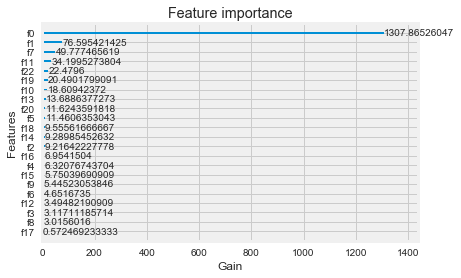

In [35]:
xgb.plot_importance(bst2, importance_type='gain', xlabel='Gain')

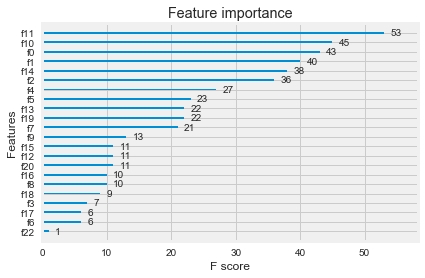

In [36]:
xgb.plot_importance(bst2)

In [37]:
dtrain.num_col(), dtest.num_col()

(23L, 23L)

In [38]:
pred = (bst2.predict(dtest) > .35).astype('int')

In [39]:
pred

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ..., 
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [40]:
lis = []
lis_ = []
for i in range(10000):
    a = np.argmax(pred[i])
    lis.append(a)
    b = max(pred[i])
    lis_.append(b)

In [41]:
lis

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 3,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 0,


In [42]:
collections.Counter(lis)

Counter({0: 6715, 1: 1888, 2: 1011, 3: 386})

In [43]:
lead['cm_key'] = mck_sorted

In [44]:
lead['label2'] = lis

In [45]:

rep = {1:'Supp' , 2:'Elite' , 3:'Credit'}

ans = lead[['cm_key','label2']]


In [46]:
ans

,cm_key,label2
2904,57673,1
3469,59130,0
9111,58957,0
6010,53608,0
6009,53607,0
8022,57094,0
3472,59141,0
4466,50975,0
989,52653,1
4470,50980,0


In [47]:

ans['label2'] = ans['label2'].map(rep)

ans = ans[ans['label2']>0]
ans =ans[:1000]
ans



C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cm_key,label2
2904,57673,Supp
989,52653,Supp
980,52632,Supp
979,52631,Supp
5995,53573,Elite
6012,53611,Supp
6016,53617,Supp
1009,52696,Supp
4432,50916,Supp
1028,52739,Supp


In [48]:
ans.to_csv('submit.csv', header=False, index=False)